In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Preprocess the Data
X_train = X_train / 255.0  # Normalize
X_test = X_test / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)  # Reshape for CNN
X_test = X_test.reshape(-1, 28, 28, 1)

In [4]:
# Build the CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 output classes (digits 0-9)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
#Compile the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [6]:
#Train the Model
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 41ms/step - accuracy: 0.9099 - loss: 0.2946 - val_accuracy: 0.9851 - val_loss: 0.0445
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 37ms/step - accuracy: 0.9862 - loss: 0.0442 - val_accuracy: 0.9894 - val_loss: 0.0331
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 35ms/step - accuracy: 0.9904 - loss: 0.0307 - val_accuracy: 0.9893 - val_loss: 0.0335
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 39ms/step - accuracy: 0.9934 - loss: 0.0215 - val_accuracy: 0.9890 - val_loss: 0.0334
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 37ms/step - accuracy: 0.9958 - loss: 0.0140 - val_accuracy: 0.9905 - val_loss: 0.0337


In [7]:
#Test the Model on a Random Image
index = np.random.randint(0, len(X_test))  # Pick a random image
image = X_test[index].reshape(1, 28, 28, 1)  # Reshape for model
pred = np.argmax(model.predict(image))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


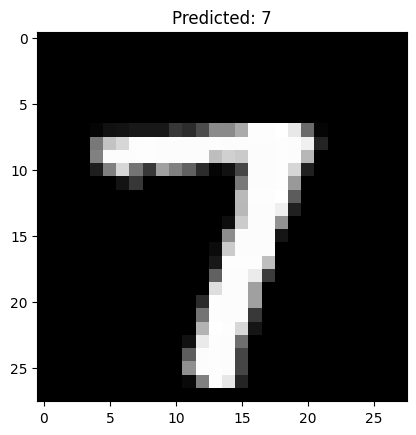

In [8]:
#Display the Image & Prediction
plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {pred}")
plt.show()